In [1]:
import pandas as pd

#df = pd.read_csv("../riskyfood_2023-07-19T113234_405932.csv")
df = pd.read_csv("../riskyfood_2023-07-25T150110_995385.csv")

/var/folders/tn/1_gbhpks7hqbkbln2gjhcdvm0000gp/T/ipykernel_19041/3038069395.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../riskyfood_2023-07-25T150110_995385.csv")


In [2]:
df.head()

,RunId,iteration,Step,n,mode,prob_notcontaminated,contaminated,average_risk_level,min_risk_level,max_risk_level,num_agents,AgentID,risk_level,payoff
0,0,0,0,110,types,0.765003,0,0.500000,0.0,1.0,110,NaN,NaN,NaN
1,0,0,1,110,types,0.284317,1,0.585714,0.0,1.0,140,0-0,0.0,2.0
2,0,0,1,110,types,0.284317,1,0.585714,0.0,1.0,140,0-1,0.0,2.0
3,0,0,1,110,types,0.284317,1,0.585714,0.0,1.0,140,0-2,0.0,2.0
4,0,0,1,110,types,0.284317,1,0.585714,0.0,1.0,140,0-3,0.0,2.0


In [3]:
# on the first version of the risky food sim, we couldn't do 100 steps for these because of the population explosion problem
# how many steps did we end up with?
df.Step.value_counts()


Step
94    83302
29    43986
95    43622
93    41702
98    25702
      ...  
54      348
57      347
59      315
58      285
0        10
Name: count, Length: 101, dtype: int64

In [4]:
last_step_n = max(df.Step)
last_step_n

100

In [5]:
# get data from the last step of each run
last_step = df[df.Step == last_step_n]
last_step

,RunId,iteration,Step,n,mode,prob_notcontaminated,contaminated,average_risk_level,min_risk_level,max_risk_level,num_agents,AgentID,risk_level,payoff
2090,0,0,100,110,types,0.452254,0,0.009091,0.0,0.1,11,0-0,0.0,2.0
2091,0,0,100,110,types,0.452254,0,0.009091,0.0,0.1,11,0-1,0.0,2.0
2092,0,0,100,110,types,0.452254,0,0.009091,0.0,0.1,11,0-2,0.0,2.0
2093,0,0,100,110,types,0.452254,0,0.009091,0.0,0.1,11,0-3,0.0,2.0
2094,0,0,100,110,types,0.452254,0,0.009091,0.0,0.1,11,0-4,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635962,9,9,100,110,types,0.003153,1,0.996109,0.0,1.0,2570,18598,1.0,1.0
635963,9,9,100,110,types,0.003153,1,0.996109,0.0,1.0,2570,18599,1.0,1.0
635964,9,9,100,110,types,0.003153,1,0.996109,0.0,1.0,2570,18600,1.0,1.0
635965,9,9,100,110,types,0.003153,1,0.996109,0.0,1.0,2570,18601,1.0,1.0


## overall risk distribution at end of simulations

<Axes: >

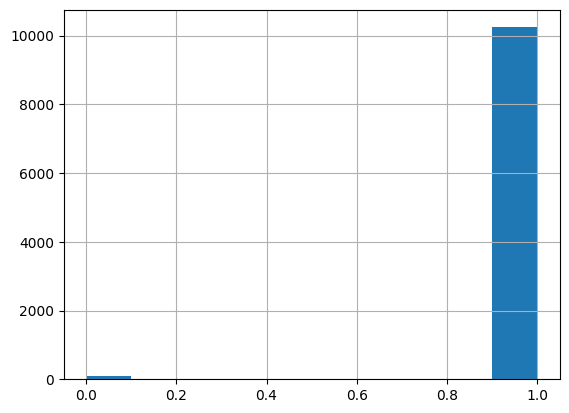

In [6]:
# overall ending risk distribution across all runs
last_step.risk_level.hist()

<Axes: >

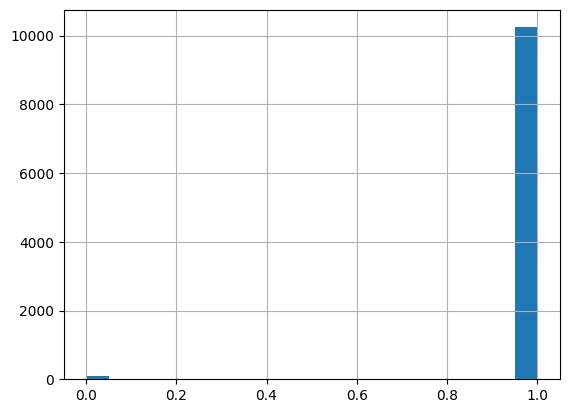

In [7]:
# does it look any different if we change the number of bins?
last_step.risk_level.hist(bins=20)

In [8]:
# how many runs did we have?
# only 5, no variation in parameters
last_step.RunId.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

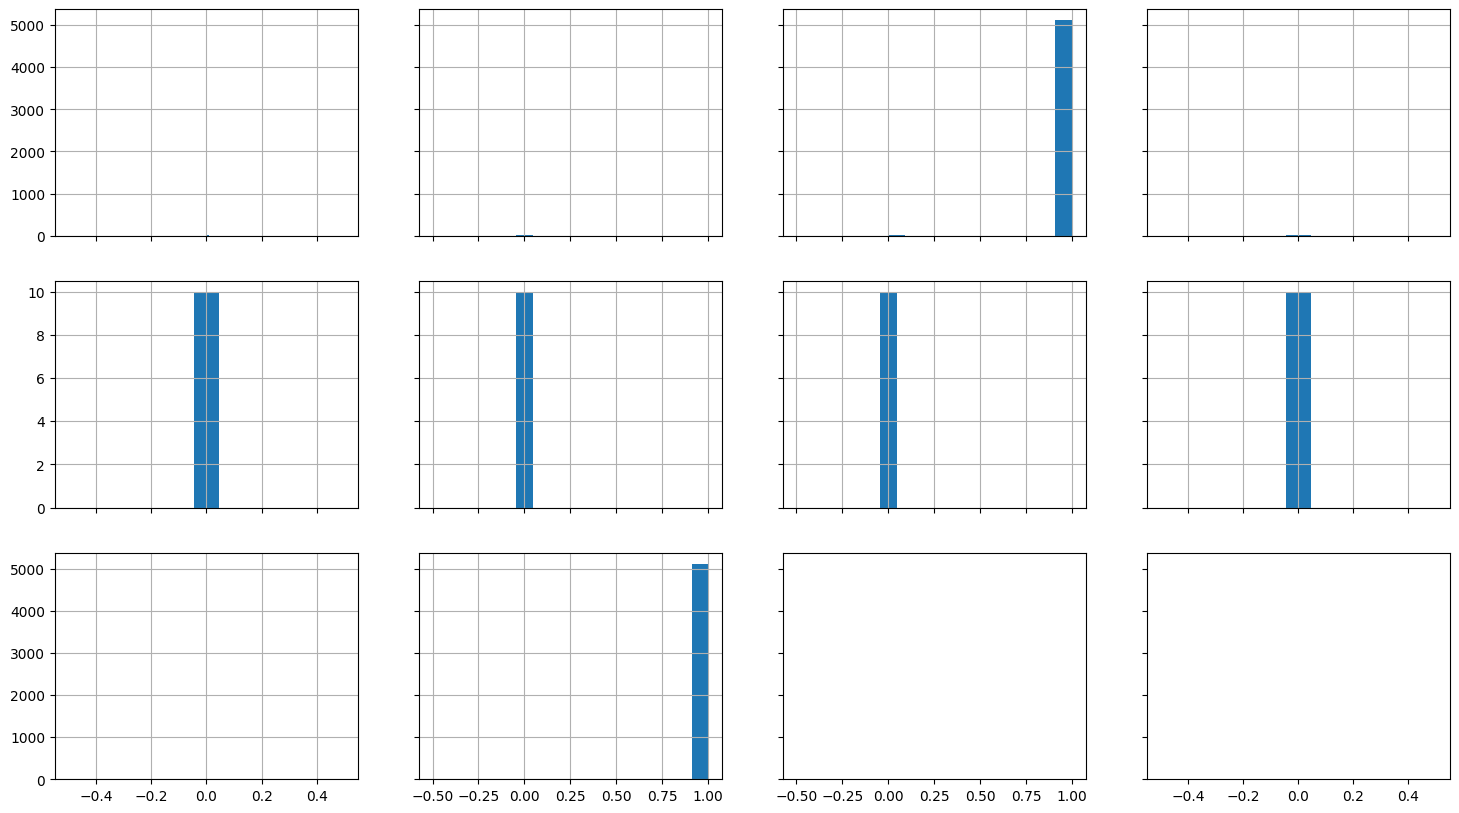

In [14]:
# plot a histogram of ending risk levels for each run
# combine into a grid of plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, nrows=3, sharex='col', sharey='row', figsize=(18,10))

for run in last_step.RunId.unique():
    run_last_step = last_step[last_step.RunId == run]
    plot_location = ax[int(run/4), int(run % 4)]
    run_last_step.risk_level.hist(ax=plot_location, bins=11)